In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

from shapely.geometry import Point

import folium

import pyproj

import json

In [2]:
# Importing "Hospitals" - DataFrame

hospitals = pd.read_csv('BD FINAL/datasets/dhaka_hospitals.csv', 
                      usecols = ['Hospital Name','Longitude','Latitude']
                     )

hospitals.head(3)

,Hospital Name,Latitude,Longitude
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815
1,Combined Military Hospital Dhaka,23.814674,90.398823
2,Combined Military Hospital Savar,23.910617,90.268770


In [3]:
# Importing "Dhaka" - GeoDataFrame

dhaka_geo_df = gpd.read_file('BD FINAL/datasets/dhaka_administrative_boundaries.shp')

dhaka_geo_df.head(3)

,Area_km2,ShapeLengt,Ward_ID,geometry
0,5.598580,17.743506,1,"POLYGON ((90.38590 23.89542, 90.38703 23.89429..."
1,1.884878,6.142796,2,"POLYGON ((90.37229 23.83337, 90.37278 23.83331..."
2,1.314906,5.875538,3,"POLYGON ((90.37648 23.81737, 90.37665 23.81703..."


In [4]:
dhaka_geo_df.crs = "EPSG:4326"

print(dhaka_geo_df.crs)

EPSG:4326


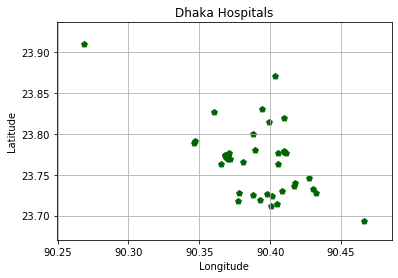

In [5]:
# Plotting a normal DataFrame - 'schools'

plt.scatter(hospitals.Longitude,
            hospitals.Latitude,
            c = 'darkgreen',
            marker = 'p'
           )

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('Dhaka Hospitals')

plt.grid()

plt.show()

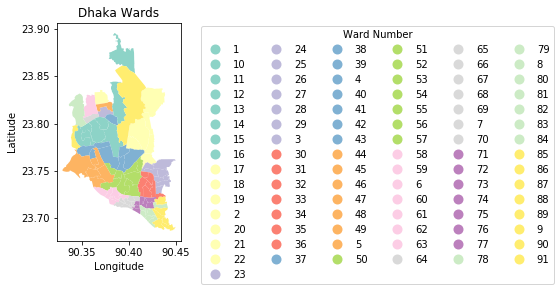

<Figure size 1080x1080 with 0 Axes>

In [6]:
# Plotting a GeoDataFrame - 'dhaka_geo_df'

leg_kwds = {'title': 'Ward Number',
            'loc': 'upper left',
            'bbox_to_anchor': (1, 1.08),
            'borderaxespad': 2,
            'ncol': 6
           }

dhaka_geo_df.plot(column = 'Ward_ID',
                  cmap = 'Set3',
                  legend = True,
                  legend_kwds = leg_kwds
                  )

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('Dhaka Wards')

plt.figure(figsize = (15, 15))

plt.show()

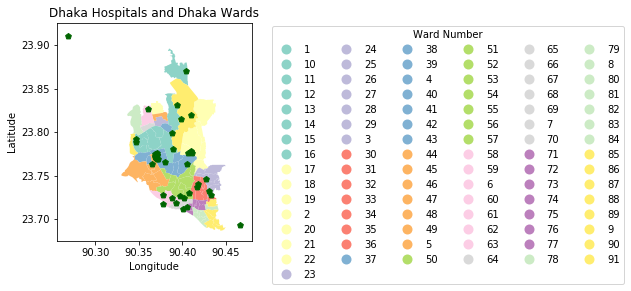

<Figure size 1080x1080 with 0 Axes>

In [7]:
# Plotting a GeoDataFrame - 'dhaka_geo_df'

leg_kwds = {'title': 'Ward Number',
            'loc': 'upper left',
            'bbox_to_anchor': (1, 1.08),
            'borderaxespad': 2,
            'ncol': 6
           }

dhaka_geo_df.plot(column = 'Ward_ID',
                  cmap = 'Set3',
                  legend = True,
                  legend_kwds = leg_kwds
                  )

plt.scatter(hospitals.Longitude, hospitals.Latitude, marker = 'p', c = 'darkgreen')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('Dhaka Hospitals and Dhaka Wards')

plt.figure(figsize = (15, 15))

plt.show()

In [8]:
hospitals.head(3)

,Hospital Name,Latitude,Longitude
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815
1,Combined Military Hospital Dhaka,23.814674,90.398823
2,Combined Military Hospital Savar,23.910617,90.268770


In [9]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hospital Name  42 non-null     object 
 1   Latitude       42 non-null     float64
 2   Longitude      42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [10]:
# Creating a Point 'geometry' column for 'hospitals' DataFrame

hospitals['geometry'] = hospitals.apply(lambda x: Point((x.Longitude, x.Latitude)), 
                                        axis = 1)

hospitals.head(3)

,Hospital Name,Latitude,Longitude,geometry
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815,POINT (90.41781499 23.74004787)
1,Combined Military Hospital Dhaka,23.814674,90.398823,POINT (90.39882331 23.81467401)
2,Combined Military Hospital Savar,23.910617,90.268770,POINT (90.26877007 23.91061709)


In [11]:
# Creating a GeoDataFrame 'hospitals_geo' from DataFrame 'hospitals' 
# with 'EPSG : 4326'

hospitals_crs = {'init': 'epsg:4326', 'no_defs': True}

hospitals_geo = gpd.GeoDataFrame(hospitals,
                                 crs = hospitals_crs,
                                 geometry = hospitals.geometry
                                )

print(hospitals_geo.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [12]:
hospitals_geo.head(3)

,Hospital Name,Latitude,Longitude,geometry
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815,POINT (90.41781 23.74005)
1,Combined Military Hospital Dhaka,23.814674,90.398823,POINT (90.39882 23.81467)
2,Combined Military Hospital Savar,23.910617,90.268770,POINT (90.26877 23.91062)


In [13]:
# 'dhaka_geo_df' GeoDataFrame's 'geometry' column is a GeoSeries

type(dhaka_geo_df.geometry)

geopandas.geoseries.GeoSeries

In [14]:
type(dhaka_geo_df)

geopandas.geodataframe.GeoDataFrame

In [15]:
dhaka_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area_km2    91 non-null     float64 
 1   ShapeLengt  91 non-null     float64 
 2   Ward_ID     91 non-null     object  
 3   geometry    91 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 3.0+ KB


In [16]:
# Head of 'dhaka_geo_df'

dhaka_geo_df.head(3)

,Area_km2,ShapeLengt,Ward_ID,geometry
0,5.598580,17.743506,1,"POLYGON ((90.38590 23.89542, 90.38703 23.89429..."
1,1.884878,6.142796,2,"POLYGON ((90.37229 23.83337, 90.37278 23.83331..."
2,1.314906,5.875538,3,"POLYGON ((90.37648 23.81737, 90.37665 23.81703..."


In [17]:
# Printing total number of dhaka wards / rows

print('There are ', dhaka_geo_df.shape[0], ' Dhaka wards.')

There are  91  Dhaka wards.


In [18]:
# Collectively calculating area of every 'dhaka_geo_df'

dhaka_geo_df_areas = dhaka_geo_df.geometry.area

In [19]:
# Printing 'dhaka_geo_df_areas'

print(dhaka_geo_df_areas.sort_values(ascending = False))

90    0.001444
17    0.000550
0     0.000497
47    0.000482
19    0.000469
        ...   
67    0.000024
71    0.000022
80    0.000022
73    0.000018
63    0.000018
Length: 91, dtype: float64


In [20]:
print(dhaka_geo_df.crs)

EPSG:4326


In [21]:
# Creating a COPY of school_districts that uses epsg 3857

dhaka_geo_df_3857 = dhaka_geo_df.to_crs(epsg = 3857)

# Defining a variable for m^2 to km^2 and getting area in km^2

sqm_to_sqkm = 10**6

dhaka_geo_df_3857_area_km = dhaka_geo_df_3857.geometry.area / sqm_to_sqkm

print(dhaka_geo_df_3857_area_km.sort_values(ascending = False))

print()

print(dhaka_geo_df_3857.crs)

90    19.556510
17     7.449037
0      6.730551
47     6.527922
19     6.348603
        ...    
67     0.321106
71     0.303370
80     0.294012
73     0.246503
63     0.246190
Length: 91, dtype: float64

{'init': 'epsg:3857', 'no_defs': True}


In [22]:
dhaka_geo_df = dhaka_geo_df_3857.to_crs(epsg = 4326)

print(dhaka_geo_df.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [23]:
# Head() of 'dhaka_geo_df' with EPSG : 4326

dhaka_geo_df.head(3)

,Area_km2,ShapeLengt,Ward_ID,geometry
0,5.598580,17.743506,1,"POLYGON ((90.38590 23.89542, 90.38703 23.89429..."
1,1.884878,6.142796,2,"POLYGON ((90.37229 23.83337, 90.37278 23.83331..."
2,1.314906,5.875538,3,"POLYGON ((90.37648 23.81737, 90.37665 23.81703..."


In [24]:
dhaka_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area_km2    91 non-null     float64 
 1   ShapeLengt  91 non-null     float64 
 2   Ward_ID     91 non-null     object  
 3   geometry    91 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 3.0+ KB


In [25]:
dhaka_geo_df.Ward_ID = pd.to_numeric(dhaka_geo_df.Ward_ID)

dhaka_geo_df.Ward_ID

0      1
1      2
2      3
3      4
4      5
      ..
86    87
87    88
88    89
89    90
90    91
Name: Ward_ID, Length: 91, dtype: int64

In [26]:
dhaka_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area_km2    91 non-null     float64 
 1   ShapeLengt  91 non-null     float64 
 2   Ward_ID     91 non-null     int64   
 3   geometry    91 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 3.0 KB


In [27]:
# Creating 'center' column from 'dhaka_geo_df' centroid

dhaka_geo_df['center'] = dhaka_geo_df.geometry.centroid

dhaka_geo_df['center']

0     POINT (90.39418 23.87137)
1     POINT (90.37057 23.82733)
2     POINT (90.37443 23.81209)
3     POINT (90.38238 23.80477)
4     POINT (90.37499 23.81831)
                ...            
86    POINT (90.43120 23.70353)
87    POINT (90.43929 23.69681)
88    POINT (90.44185 23.69091)
89    POINT (90.43175 23.69386)
90    POINT (90.40101 23.82431)
Name: center, Length: 91, dtype: geometry

In [28]:
# Creating 'dhaka_geo_df_centers' GeoDataFrame

# from 'dhaka_geo_df' with columns 'Ward_ID' and 'center'

part = ['Ward_ID', 'center']

dhaka_geo_df_centers = dhaka_geo_df[part]

dhaka_geo_df_centers.head(3)

,Ward_ID,center
0,1,POINT (90.39418 23.87137)
1,2,POINT (90.37057 23.82733)
2,3,POINT (90.37443 23.81209)


In [29]:
# DNCC = Dhaka North City Corporation
# DNCC has 54 wards

dncc_zone_1 = ['1', '17']
dncc_zone_2 = ['2', '3', '4', '5', '6', '7', '8', '15']
dncc_zone_3 = ['18', '19', '20', '21', '22', '23', '24',
               '25', '35', '36']
dncc_zone_4 = ['9', '10', '11', '12', '13', '14', '16']
dncc_zone_5 = ['26', '27', '28', '29', '30', '31', '32', '33', '34']
dncc_zone_6 = ['51', '52', '53', '54']
dncc_zone_7 = ['47', '48', '49', '50']
dncc_zone_8 = ['44', '45', '46']
dncc_zone_9 = ['39', '40', '43']
dncc_zone_10 = ['37', '38', '41', '42']

In [30]:
dncc_wards = [1, 17, 2, 3, 4, 5, 6, 7, 8, 15,
              18, 19, 20, 21, 22, 23, 24,
              25, 35, 36, 9, 10, 11, 12, 13, 14, 
              16, 26, 27, 28, 29, 30, 31, 32, 33, 
              34, 51, 52, 53, 54, 47, 48, 49, 50,
              44, 45, 46, 39, 40, 43, 37, 38, 41,
              42
             ]

In [31]:
# DNCC Wards ONLY - STARTS Here

dncc_geo_df = dhaka_geo_df.loc[dhaka_geo_df['Ward_ID'].isin(dncc_wards)]

dncc_geo_df.head()

,Area_km2,ShapeLengt,Ward_ID,geometry,center
0,5.598580,17.743506,1,"POLYGON ((90.38590 23.89542, 90.38703 23.89429...",POINT (90.39418 23.87137)
1,1.884878,6.142796,2,"POLYGON ((90.37229 23.83337, 90.37278 23.83331...",POINT (90.37057 23.82733)
2,1.314906,5.875538,3,"POLYGON ((90.37648 23.81737, 90.37665 23.81703...",POINT (90.37443 23.81209)
3,1.124477,4.456784,4,"POLYGON ((90.38063 23.81014, 90.38175 23.80990...",POINT (90.38238 23.80477)
4,1.190894,6.657118,5,"POLYGON ((90.38132 23.82258, 90.38141 23.82257...",POINT (90.37499 23.81831)


In [32]:
dncc_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area_km2    54 non-null     float64 
 1   ShapeLengt  54 non-null     float64 
 2   Ward_ID     54 non-null     int64   
 3   geometry    54 non-null     geometry
 4   center      54 non-null     geometry
dtypes: float64(2), geometry(2), int64(1)
memory usage: 2.5 KB


In [33]:
dncc_geo_df.crs

{'init': 'epsg:4326', 'no_defs': True}

In [34]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Hospital Name  42 non-null     object  
 1   Latitude       42 non-null     float64 
 2   Longitude      42 non-null     float64 
 3   geometry       42 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.4+ KB


In [35]:
# Creating a GeoDataFrame 'dncc_hospitals_geo' FOR ONLY DNCC Wards
# from DataFrame 'hospitals' with 'EPSG : 4326'

dncc_hospitals_geo = gpd.GeoDataFrame(hospitals, 
                                      crs = dncc_geo_df.crs,
                                      geometry = hospitals.geometry
                                     )

dncc_hospitals_geo.head()

,Hospital Name,Latitude,Longitude,geometry
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815,POINT (90.41781 23.74005)
1,Combined Military Hospital Dhaka,23.814674,90.398823,POINT (90.39882 23.81467)
2,Combined Military Hospital Savar,23.910617,90.268770,POINT (90.26877 23.91062)
3,Medical Squadron Base Bashar,23.780641,90.389564,POINT (90.38956 23.78064)
4,"Medical Squadron, BAF Bangabandhu",23.830658,90.394037,POINT (90.39404 23.83066)


In [36]:
print(dncc_hospitals_geo.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [37]:
dncc_hospitals_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Hospital Name  42 non-null     object  
 1   Latitude       42 non-null     float64 
 2   Longitude      42 non-null     float64 
 3   geometry       42 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.4+ KB


In [38]:
dncc_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area_km2    54 non-null     float64 
 1   ShapeLengt  54 non-null     float64 
 2   Ward_ID     54 non-null     int64   
 3   geometry    54 non-null     geometry
 4   center      54 non-null     geometry
dtypes: float64(2), geometry(2), int64(1)
memory usage: 2.5 KB


In [39]:
# Spatial-join 'hospitals' WITHIN 'DNCC' area

hospitals_within_dncc_area = gpd.sjoin(dncc_hospitals_geo, 
                                       dncc_geo_df, 
                                       op = 'within'
                                      )

hospitals_within_dncc_area.shape

(27, 9)

In [40]:
hospitals_within_dncc_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 40
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Hospital Name  27 non-null     object  
 1   Latitude       27 non-null     float64 
 2   Longitude      27 non-null     float64 
 3   geometry       27 non-null     geometry
 4   index_right    27 non-null     int64   
 5   Area_km2       27 non-null     float64 
 6   ShapeLengt     27 non-null     float64 
 7   Ward_ID        27 non-null     int64   
 8   center         27 non-null     geometry
dtypes: float64(4), geometry(2), int64(2), object(1)
memory usage: 2.1+ KB


In [41]:
hospitals_within_dncc_area.head()

,Hospital Name,Latitude,Longitude,geometry,index_right,Area_km2,ShapeLengt,Ward_ID,center
0,Bangabandhu Sheikh Mujib Medical University Ho...,23.740048,90.417815,POINT (90.41781 23.74005),28,1.285262,6.778113,36,POINT (90.41379 23.73445)
10,Central Police Hospital,23.736508,90.416718,POINT (90.41672 23.73651),28,1.285262,6.778113,36,POINT (90.41379 23.73445)
5,Bangladesh Parliament Secretariat Clinic,23.765759,90.380492,POINT (90.38049 23.76576),39,3.439873,8.936790,40,POINT (90.37915 23.76453)
20,Bangladesh Shishu Hospital and Institute,23.773151,90.370163,POINT (90.37016 23.77315),39,3.439873,8.936790,40,POINT (90.37915 23.76453)
23,Shaheed Suhrawardy Medical College and Hospital,23.769440,90.371383,POINT (90.37138 23.76944),39,3.439873,8.936790,40,POINT (90.37915 23.76453)


In [42]:
# Importing pprint to format dictionary output 
# for hostpital distance from center

import pprint

distances = {}

for row in hospitals_within_dncc_area.iterrows():
    
    values = row[1]
    
    key = values['Hospital Name']
    
    center = values['center']
    
    distances[key] = values['geometry'].distance(center)
    
pprint.pprint(distances)

{'250 Bedded E- TB hospital Shamoli': 0.004566067224792173,
 'Bangabandhu Sheikh Mujib Medical University Hospital': 0.006894314838071609,
 'Bangladesh Parliament Secretariat Clinic': 0.001815190006367795,
 'Bangladesh Shishu Hospital and Institute': 0.012455386721642881,
 'Central Police Hospital': 0.003577420063510447,
 'Dhaka Dental College Hospital': 0.007821012150453624,
 'Dhaka Infectious Diseases Hospital': 0.0025720776641799644,
 'Dhalpur-Nagar Matrisodon': 0.0025354500073099607,
 'Kuwait Bangladesh Friendship Government Hospital': 0.009493452813546025,
 'Maternal and Child Health Training Institute Lalkuthi Hospital': 0.005762585527896412,
 'Mohammadpur Fertility Services & Training Centre, 100 Bedded Mother & Child Health Hospital': 0.0033776788181207277,
 'Mugda Medical College and Hospital': 0.0030933913859454406,
 'Nagar Matrisadan Tilpapara': 0.003818728668071924,
 'Nagar Matrisadan and Nagar Sashtho Kendro 2': 0.008351052918317609,
 'Nagor Matri Sadon Kendro 3': 0.008061

In [43]:
dncc_geo_df.center

0     POINT (90.39418 23.87137)
1     POINT (90.37057 23.82733)
2     POINT (90.37443 23.81209)
3     POINT (90.38238 23.80477)
4     POINT (90.37499 23.81831)
5     POINT (90.35539 23.79559)
6     POINT (90.35931 23.81828)
7     POINT (90.35971 23.80587)
8     POINT (90.34674 23.81421)
9     POINT (90.34278 23.78462)
10    POINT (90.35006 23.78442)
11    POINT (90.35634 23.78611)
12    POINT (90.36627 23.79102)
13    POINT (90.37229 23.80083)
14    POINT (90.43220 23.73008)
15    POINT (90.38871 23.82109)
16    POINT (90.38325 23.78377)
17    POINT (90.42511 23.82487)
18    POINT (90.42020 23.80150)
19    POINT (90.41190 23.79040)
20    POINT (90.40466 23.77861)
21    POINT (90.43279 23.72355)
22    POINT (90.41899 23.72727)
23    POINT (90.42285 23.77718)
24    POINT (90.42614 23.73017)
25    POINT (90.42116 23.73472)
26    POINT (90.42000 23.76228)
27    POINT (90.42011 23.75428)
28    POINT (90.41379 23.73445)
29    POINT (90.42487 23.74897)
30    POINT (90.43557 23.74774)
31    PO

In [44]:
print(dncc_geo_df.center[0])

POINT (90.39418047174077 23.87136784285555)


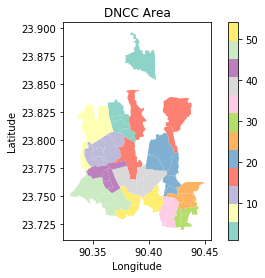

<Figure size 1080x1080 with 0 Axes>

In [45]:
# Plotting a GeoDataFrame - 'dncc_geo_df'
# using the 'hospitals_within_dncc_area' hospitals

leg_kwds = {'title': 'Ward Number',
            'loc': 'upper left',
            'bbox_to_anchor': (1, 1.08),
            'borderaxespad': 2,
            'ncol': 6
           }

dncc_geo_df.plot(column = 'Ward_ID',
                 cmap = 'Set3',
                 legend = True,
                 #legend_kwds = leg_kwds
                )

#plt.scatter(hospitals_within_dncc_area.Longitude, 
#            hospitals_within_dncc_area.Latitude, 
#            marker = 'p', 
#            c = 'darkgreen')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.title('DNCC Area')

plt.figure(figsize = (15, 15))

plt.show()

In [46]:
# Folium location from District 1 Centroid

dncc_geo_df_center_point = dncc_geo_df.center[16]

type(dncc_geo_df_center_point)

shapely.geometry.point.Point

In [47]:
print(dncc_geo_df_center_point)

POINT (90.38324678768981 23.78376523613031)


In [48]:
# Reversing the order for Folium location array

new_dncc_geo_df_center_point = [dncc_geo_df_center_point.y, 
                                dncc_geo_df_center_point.x
                               ]

# Printing center point and dncc_area_center

print("Center Point:", dncc_geo_df_center_point)

print()

print("Disctrict Center:", new_dncc_geo_df_center_point)

Center Point: POINT (90.38324678768981 23.78376523613031)

Disctrict Center: [23.783765236130307, 90.38324678768981]


In [52]:
# Creating Folium Map centered on 'DNCC Area'

# 'district_one_map' == 'm' variable

dncc_geo_df_map = folium.Map(
    location = new_dncc_geo_df_center_point, 
    zoom_start = 12)

In [53]:
# Adding the outline of 'dncc area'; outline -- geometry needed

folium.GeoJson(dncc_geo_df.geometry).add_to(dncc_geo_df_map)

In [54]:
# Displaying the resulting dncc map

display(dncc_geo_df_map)

In [56]:
# NOW, Hospitals within dncc area - In Details

for row in hospitals_within_dncc_area.iterrows():
    
    row_values = row[1]
    
    print(row_values)

Hospital Name    Bangabandhu Sheikh Mujib Medical University Ho...
Latitude                                                     23.74
Longitude                                                  90.4178
geometry                           POINT (90.41781499 23.74004787)
index_right                                                     28
Area_km2                                                   1.28526
ShapeLengt                                                 6.77811
Ward_ID                                                         36
center                 POINT (90.41379248944232 23.73444866770415)
Name: 0, dtype: object
Hospital Name                        Central Police Hospital
Latitude                                             23.7365
Longitude                                            90.4167
geometry                     POINT (90.41671757 23.73650824)
index_right                                               28
Area_km2                                             1.28526
ShapeLen

In [57]:
hospitals_within_dncc_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 40
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Hospital Name  27 non-null     object  
 1   Latitude       27 non-null     float64 
 2   Longitude      27 non-null     float64 
 3   geometry       27 non-null     geometry
 4   index_right    27 non-null     int64   
 5   Area_km2       27 non-null     float64 
 6   ShapeLengt     27 non-null     float64 
 7   Ward_ID        27 non-null     int64   
 8   center         27 non-null     geometry
dtypes: float64(4), geometry(2), int64(2), object(1)
memory usage: 2.1+ KB


In [77]:
# Building Marker locations + Popups

# Creating Folium Map centered on 'DNCC Area'

# 'dncc_geo_df_map_markpop' == 'm' variable

dncc_geo_df_map_markpop = folium.Map(
    location = new_dncc_geo_df_center_point, 
    zoom_start = 14
)

In [78]:
# Creating Marker and Popup for each hospital in DNCC Area

for row in hospitals_within_dncc_area.iterrows():
    
    row_values = row[1]
    
    location = [row_values['Latitude'], row_values['Longitude']]
    
    popup = popup = '<strong>' + row_values['Hospital Name'] + '</strong>'
    
    tooltip = "Click it!"
    
    marker = folium.Marker(location = location, 
                           popup = popup, 
                           tooltip = tooltip)
    
    marker.add_to(dncc_geo_df_map_markpop)


display(dncc_geo_df_map_markpop)



In [80]:
# Adding layer control to toggle on / off

folium.LayerControl().add_to(dncc_geo_df_map_markpop)

# Saving Map as HTML file

dncc_geo_df_map_markpop.save('hospitals_within_dncc_area6FINAL.html') 

# Displaying the Map
dncc_geo_df_map_markpop 